#Twitter US Airline Sentiment

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons.
it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines

In [2]:
# import all libraries
import pandas as pd
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read a csv file
df = pd.read_csv('/content/drive/MyDrive/datascience/project /main NLP/Tweets.csv')

In [4]:
#First 30 rows
df.head(30)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [5]:
#last 20 rows
df.tail(20)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14620,569590965880532993,negative,1.0000,Customer Service Issue,1.0000,American,NaN,KCBobolz,NaN,0,@AmericanAir I wait 2+ hrs for CS to call me b...,NaN,2015-02-22 12:14:03 -0800,"Milwaukee County, Wisconsin",Central Time (US & Canada)
14621,569590892085915649,negative,1.0000,Customer Service Issue,1.0000,American,NaN,andyellwood,NaN,0,@AmericanAir I've been on hold for 55 mins abo...,NaN,2015-02-22 12:13:45 -0800,"New York, New York",Eastern Time (US & Canada)
14622,569590191758962688,negative,1.0000,Late Flight,0.3358,American,NaN,Jill_Lynnette,NaN,0,I just need a place to sleep when I land witho...,NaN,2015-02-22 12:10:58 -0800,NaN,Eastern Time (US & Canada)
14623,569590013278756865,positive,0.6274,NaN,0.0000,American,NaN,Flora_Lola_NYC,NaN,0,@AmericanAir Love the new planes for the JFK-L...,NaN,2015-02-22 12:10:16 -0800,NaN,Eastern Time (US & Canada)
14624,569589959088173056,negative,1.0000,Can't Tell,1.0000,American,NaN,yourlama,NaN,0,"@AmericanAir Call me Chairman, or call me Emer...","[32.9070889, -97.03785947]",2015-02-22 12:10:03 -0800,NaN,NaN
14625,569589643487928321,positive,1.0000,NaN,NaN,American,NaN,DrCaseyJRudkin,NaN,0,@AmericanAir Flight 236 was great. Fantastic c...,"[40.64946781, -73.76624703]",2015-02-22 12:08:48 -0800,East Coast,NaN
14626,569589460226183168,negative,1.0000,Late Flight,1.0000,American,NaN,cataattack,NaN,0,@AmericanAir Flight 953 NYC-Buenos Aires has b...,NaN,2015-02-22 12:08:04 -0800,"Buenos Aires, Argentina",Buenos Aires
14627,569588816438169600,negative,1.0000,Cancelled Flight,1.0000,American,NaN,KristinaMeyer7,NaN,0,"@AmericanAir Flight Cancelled Flightled, can't...",NaN,2015-02-22 12:05:30 -0800,NaN,Eastern Time (US & Canada)
14628,569588651925098496,positive,1.0000,NaN,NaN,American,NaN,jlhalldc,NaN,0,Thank you. “@AmericanAir: @jlhalldc Customer R...,NaN,2015-02-22 12:04:51 -0800,"Washington, DC",Eastern Time (US & Canada)
14629,569588591602458624,negative,1.0000,Customer Service Issue,1.0000,American,NaN,jontgreen89,NaN,0,@AmericanAir How do I change my flight if the ...,NaN,2015-02-22 12:04:37 -0800,"Waco, TX",Central Time (US & Canada)


In [6]:
#dataset shape
df.shape

(14640, 15)

In [7]:
#display dataframe information like colimn details,datatype,memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
#check the null value
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [9]:
#null value percentage
percentage = (df.isna().sum()/df.shape[0])*100
percent = pd.DataFrame(percentage)
percent


,0
tweet_id,0.000000
airline_sentiment,0.000000
airline_sentiment_confidence,0.000000
negativereason,37.308743
negativereason_confidence,28.128415
airline,0.000000
airline_sentiment_gold,99.726776
name,0.000000
negativereason_gold,99.781421
retweet_count,0.000000


In [10]:
#removung null value using bfill and ffill
df.fillna(method='bfill',inplace=True)

<ipython-input-10-a646b3ddaaa6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill',inplace=True)


In [11]:

df.fillna(method='ffill',inplace=True)

<ipython-input-11-ae2c85fc64fc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [12]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,0
negativereason_confidence,0
airline,0
airline_sentiment_gold,0
name,0
negativereason_gold,0
retweet_count,0


In [13]:
#column names
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [14]:
#duplicate rows
dpl_rows = df.duplicated()
print(dpl_rows)

0        False
1        False
2        False
3        False
4        False
         ...  
14635    False
14636    False
14637    False
14638    False
14639    False
Length: 14640, dtype: bool


In [16]:

airline_sentiment = df.airline_sentiment.value_counts()
airline_sentiment

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


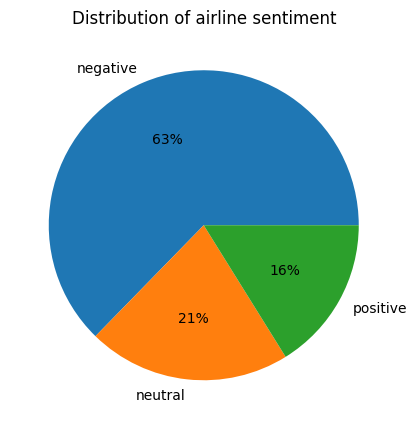

In [18]:
#pie plot
plt.figure(figsize=(5,10))
plt.title('Distribution of airline sentiment')
plt.pie(airline_sentiment,labels=airline_sentiment.index,autopct='%1.0f%%')
plt.show()


Here 62% sentiment are negative, 21% is neutral and 16% is positive

In [21]:
airline_sentimentt = df.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
airline_sentimentt

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


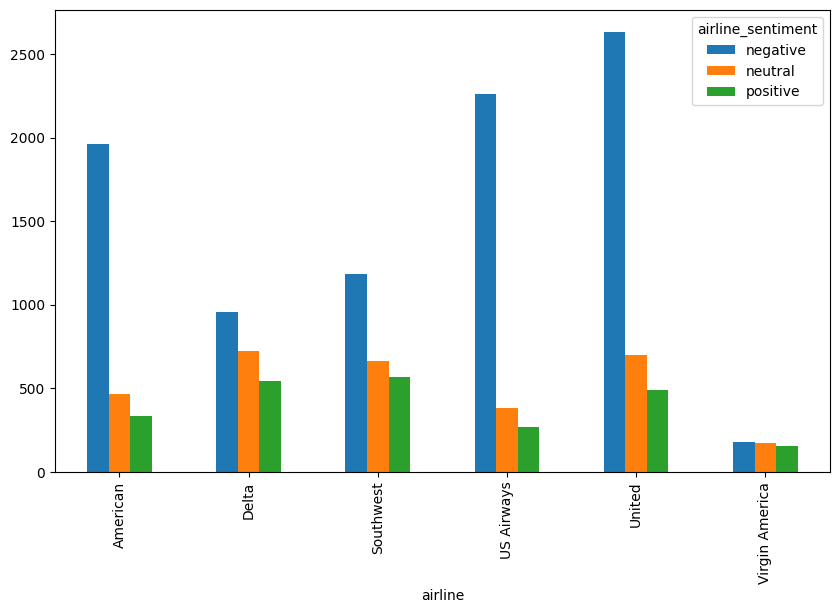

In [22]:
plot = airline_sentimentt.plot(kind='bar',figsize=(10,6))

all airlines contain more no of negative sentiments and folled by neutral and positive setiments. virgin america is the only aieline where the ratioof the three sentiments is similar

In [23]:
#Extracting features and labels
features = df.iloc[:,10].values
labels = df.iloc[:,1].values

In [24]:
processed_features = []
for sentence in range(0, len(features)):
  # Remove all the special characters
  processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

  # remove all single characters
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

  #remove single characters from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

  #substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  #removing prefixed 'b'
  processed_feature = re.sub(r'^b\s+', '', processed_feature)

  #converting to lowercase
  processed_feature = processed_feature.lower()

  processed_features.append(processed_feature)

In [25]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
#word_tokenize : this step ensures that very short words are removed from the text.


from nltk.tokenize import word_tokenize

# Assuming 'features' is your existing numpy array
features_series = pd.Series(processed_features) # Convert to pandas Series

processed_features= features_series.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [27]:
#stemming:this step standardizes the text by reducing word to their base forms.

from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')


processed_features = processed_features.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [29]:
#stopword removal and TF-IDF vectorization

from nltk.corpus import stopwords
nltk.download('stopwords')    # stopword package is downloaded
from sklearn.feature_extraction.text import TfidfVectorizer
#TfidfVectorizer :converts the yext data into a numerical matrix based on Term Frequency-Inverse Document Frequency(TF-IDF)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
vectorizer = TfidfVectorizer(max_features=2500,min_df=7,max_df=0.8,stop_words=stopwords.words('english'))
processed_feature = vectorizer.fit_transform(processed_features).toarray()

In [31]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_feature, labels, test_size=0.2, random_state=0)

LogisticRegression MODEL

In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [33]:
lr_y_pred = lr_model.predict(x_test)


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,lr_y_pred))
print(accuracy_score(y_test,lr_y_pred))

[[1729  112   29]
 [ 259  316   39]
 [ 116   58  270]]
0.7906420765027322


accuracy score :0.79

In [35]:
x_test_pred = lr_model.predict(x_test)
test_accuracy = accuracy_score(x_test_pred,y_test)
test_accuracy

0.7906420765027322

In [36]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1870
     neutral       0.65      0.51      0.57       614
    positive       0.80      0.61      0.69       444

    accuracy                           0.79      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



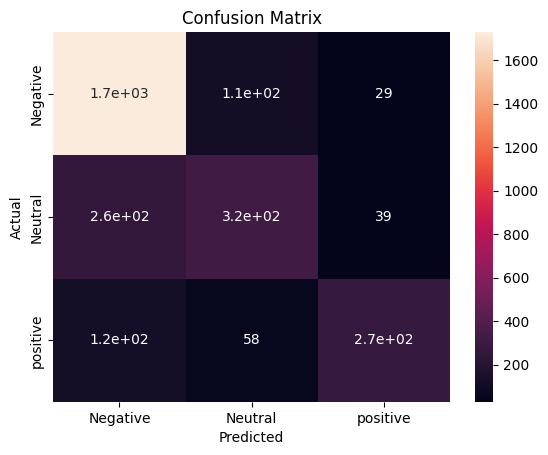

In [38]:
sns.heatmap(confusion_matrix(y_test,lr_y_pred),annot=True,xticklabels=['Negative','Neutral','positive'],yticklabels=['Negative','Neutral','positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

prediction using LogisticRegression model

In [39]:
text = 'Cancelled Flight'

In [40]:
#prediction of the text
input_data = [text] # Use text directly, it is already a string
input_data = vectorizer.transform(input_data).toarray()
prediction = lr_model.predict(input_data)
print(prediction)


['negative']


RandomForest MODEL

In [41]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier(n_estimators=200,random_state=0)
random_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [42]:
random_y_pred = random_model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,random_y_pred))
print(accuracy_score(y_test,random_y_pred))

[[1723  114   33]
 [ 306  267   41]
 [ 149   60  235]]
0.7599043715846995


accuracy score : 0.759

In [44]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,random_y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.61      0.43      0.51       614
    positive       0.76      0.53      0.62       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



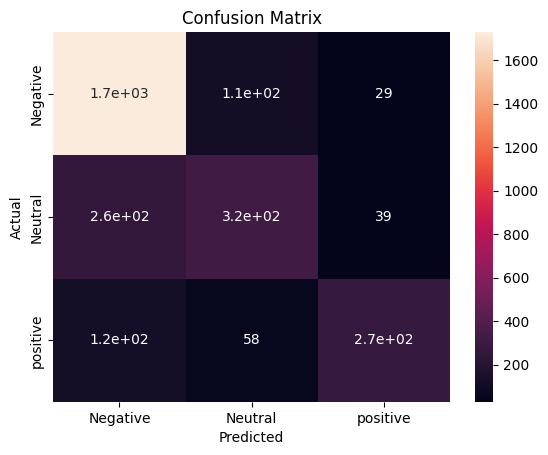

In [45]:
sns.heatmap(confusion_matrix(y_test,lr_y_pred),annot=True,xticklabels=['Negative','Neutral','positive'],yticklabels=['Negative','Neutral','positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

predition using RandomForest model

In [46]:
text1='Flight Booking Problems'

In [47]:
input_data = [text] # Use text directly, it is already a string
input_data = vectorizer.transform(input_data).toarray()
prediction = random_model.predict(input_data)
print(prediction)

['neutral']
